In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("spam_ham_dataset.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
data.shape

(5171, 4)

In [7]:
data['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [19]:

data.loc[data["label"]=="ham","label"]=0
data.loc[data["label"]=="spam","label"]=1

data.head()

,Unnamed: 0,label,text,label_num
0,605,0,enron methanol ; meter # : 988291\r\nthis is ...,0
1,2349,0,"hpl nom for january 9 , 2001\r\n( see attache...",0
2,3624,0,"neon retreat\r\nho ho ho , we ' re around to ...",0
3,4685,1,"photoshop , windows , office . cheap . main t...",1
4,2030,0,re : indian springs\r\nthis deal is to book t...,0


In [21]:
data['label'].value_counts()

label
0    3672
1    1499
Name: count, dtype: int64

In [23]:
import seaborn as sns

<Axes: ylabel='count'>

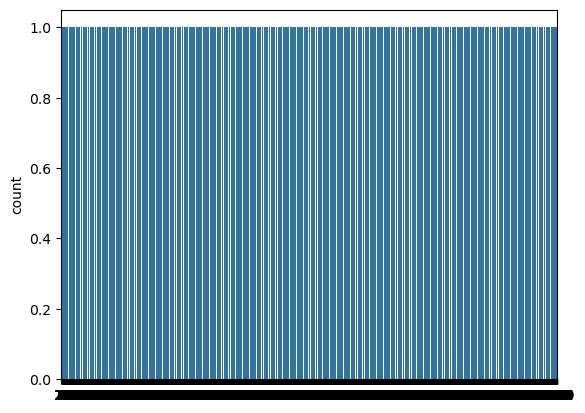

In [25]:
sns.countplot(data['label'])

In [27]:
data.duplicated().sum()

0

In [29]:
X = data['text'].values
y = data['label'].values

In [31]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=object)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
#split email dataset 
data['label']=data['label'].astype(str).astype(int)
X_train, X_test , y_train, y_test = train_test_split(data['text'], data['label'] , test_size=0.3)
#vectorize our training dataset 
Vectorizer = CountVectorizer()
count= Vectorizer.fit_transform(X_train.values)
#fit the dataset on multinomial naive bayes 
Spam_detection = MultinomialNB()
targets = y_train.values
Spam_detection.fit(count, targets)


MultinomialNB()
#make predictions 
y_predict = Spam_detection.predict(Vectorizer.transform(X_test))
#test accuracy 
accuracy_score(y_test, y_predict)

0.9748711340206185